# Ejercicio periodicos

Un comerciante vende periodicos a $\$11$ pesos cada uno. Cada periodico le cuesta al comerciante $\$9$ pesos cada auno. Las ventas de periodo del comercio a partir de su experiencia se reflejan en la tabla siguiente. 


<table>
    <tr style="background-color: #008585;">
        <th>Periodicos</th>
        <th>30</th>
        <th>40</th>
        <th>50</th>
        <th>60</th>
        <th>70</th>
    </tr>
    <tr style="background-color: #74a892;">
        <td>f(x)</td>
        <td>0.20</td>
        <td>0.25</td>
        <td>0.25</td>
        <td>0.20</td>
        <td>0.10</td>
    </tr>
</table>


Consideremos un costo de $\$2$ pesos por venta perdida y un costo de $\$1$ peso por cada reciclaje de cada periodico no vendido. Determine el beneficio promedio diario si pide 50 periodicos cada día.
1. Por simulación.
2. Analíticamente.

## Simulación

Formulamos la distribución de probabilidad de cada variable.

<table>
    <tr style="background-color: #008585;">
        <th>Periodicos</th>
        <th>30</th>
        <th>40</th>
        <th>50</th>
        <th>60</th>
        <th>70</th>
    </tr>
    <tr style="background-color: #74a892;">
        <td>f(x)</td>
        <td>0.20</td>
        <td>0.25</td>
        <td>0.25</td>
        <td>0.20</td>
        <td>0.10</td>
    </tr>
</table>


Establecemos la distribución acumulada de probabilidad de cada variable.

<table>
    <tr style="background-color: #008585;">
        <th>Periodicos</th>
        <th>30</th>
        <th>40</th>
        <th>50</th>
        <th>60</th>
        <th>70</th>
    </tr>
    <tr style="background-color: #74a892;">
        <td>f(x)</td>
        <td>0.20</td>
        <td>0.25</td>
        <td>0.25</td>
        <td>0.20</td>
        <td>0.10</td>
    </tr>
    <tr style="background-color: #74a892;">
        <td>F(x)</td>
        <td>0.20</td>
        <td>0.45</td>
        <td>0.70</td>
        <td>0.90</td>
        <td>1.00</td>
    </tr>
</table>


Establecemos el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

<table>
    <tr style="background-color: #008585;">
        <th>Periodicos</th>
        <th>30</th>
        <th>40</th>
        <th>50</th>
        <th>60</th>
        <th>70</th>
    </tr>
    <tr style="background-color: #74a892;">
        <td>f(x)</td>
        <td>0.20</td>
        <td>0.25</td>
        <td>0.25</td>
        <td>0.20</td>
        <td>0.10</td>
    </tr>
    <tr style="background-color: #74a892;">
        <td>F(x)</td>
        <td>0.20</td>
        <td>0.45</td>
        <td>0.70</td>
        <td>0.90</td>
        <td>1.00</td>
    </tr>
    <tr style="background-color: #74a892;">
        <td>Intervalos</td>
        <td>(0,0.20)</td>
        <td>(0.21,0.45)</td>
        <td>(0.46,0.70)</td>
        <td>(0.71,0.90)</td>
        <td>(0.91,1.00)</td>
    </tr>
</table>


Empezamos la simulación. Generamos números aleatorios.

### Importamos librerias

In [2]:
import numpy as np
import random
import scipy.stats as stats
import matplotlib.pyplot as plt

### Definimos las funciones 

* "periodicos()"
* "ganacias()"
* "experimento()"
* "estabilidad_simulacion()"
* "simu()"

In [3]:

def periodicos(u): # Pide como entrada un número aleatorio.
    periodico = [30, 40, 50, 60, 70] # Posibles demandas de periodicos
    acumulado = [0, 0.20, 0.45, 0.70, 0.90, 1] # Intervalos de probabilidad de las posibles demandas de periodicos.
    simu = 0

    for i in range(len(acumulado)-1): 
        if  acumulado[i]<u and u <= acumulado[i+1]: # Esta condición identificara en que intervalo de probabilidad cae el número aleatorio u.
            simu = simu + periodico[i] 
            
    return simu # Regresa la cantidad demandada de periodicos en un día.

In [4]:
def ganancias(n): # Pide la cantidad de periodicos demandados en un día (n).
    cantidad = 50 # Cantidad de periodicos que pide al día el vendedor.
    precio = 11 # Precio al que se vende cada periodico
    costo = 9 # Costo de cada periodico
    perdida = 2 # Costo de venta perdida por cada periodico.
    reciclaje = 1 # Costo por reciclaje de cada periodico.
    ganancia = 0
    
    if n < cantidad:
        ganancia = n*(precio)-cantidad*(costo)-(cantidad-n)*(reciclaje) 
    elif n == cantidad: 
        ganancia = n*(precio)-cantidad*(costo) 
    else: 
        ganancia = (cantidad)*(precio)-cantidad*(costo)-(n-cantidad)*(perdida) 
         
    return ganancia # Regreamos la ganancia de acuerdo al número de periodicos demandados.

In [5]:
def experimento(iteraciones): # Pide el número de experiementos descrito anteriormente.
    i = 0
    utilidad = 0  
    Lista = [] 
    while i <= iteraciones:
        utilidad = utilidad + ganancias(periodicos(random.uniform(0,1))) # Esta utilidad ira sumando la ganancia de un día de acuerdo a la demanda de periodicos.
        i += 1
        beneficio = utilidad/i # Calcula el beneficio promedio mencionada en Lista.
        Lista.append(beneficio)
    return Lista #Regresa una lista del beneficio promedio diario se pide 50 periodicos cada día.

In [6]:
def estabilidad_simulacion(ensayos, area):
    plt.plot(ensayos,area)
    plt.xlabel('Número de ensayos')
    plt.ylabel('Beneficio')
    plt.title('Beneficio promedio diario al pedir 50 periodicos')
    plt.show()

In [7]:
def sim(repeticiones): 
    aproximacion = []
    for i in range(repeticiones):
        aproximacion.append(np.mean(experimento(1000))) 
    return aproximacion 

### Llamamos a las funciones 

In [8]:
n = 1000
exp = experimento(n) # Hara el experimento 1000 veces, es decir, nos dara 1000 beneficios promedio diario.

print("Beneficios promedio diarios: ", np.mean(exp))

Beneficios promedio diarios:  14.55692941277415


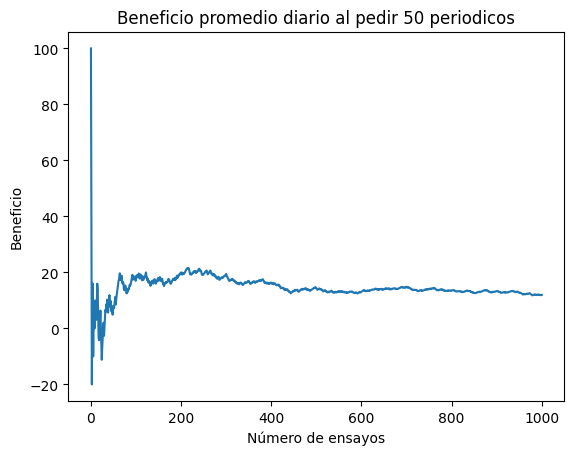

In [9]:
ensayos1 = range(0,n+1)
estabilidad_simulacion(ensayos1, exp)

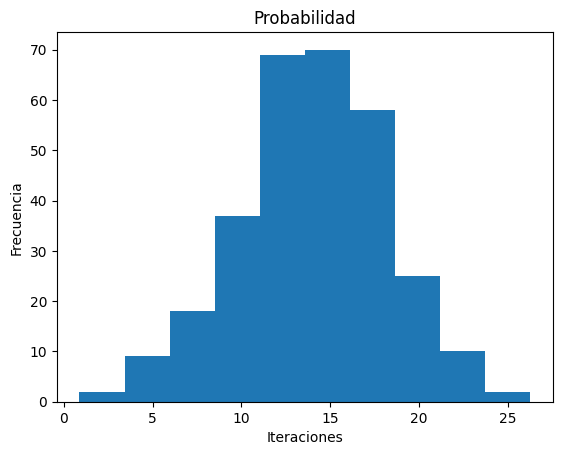

In [10]:
N = 300
simulacion = sim(N)

np.mean(simulacion)

plt.hist(simulacion) #Grafica las frecuencias de la aproximación a la probabilidad de las N simualciones con 750 experiementos cada una.
plt.xlabel('Iteraciones')
plt.ylabel('Frecuencia')
plt.title('Probabilidad')
plt.show()

## Analíticamente

Para calcular el beneficio esperado promedio, lo veremos por casos:
Caso 1, la demanda sea 30.

\begin{equation*}
\begin{aligned}
\text{Ganancia 1} &= \text{periodicos vendidos*precio - periodicos pedidos*costo de periodico - periodicos que sobraron * costo de reciclaje}\\
&= 30*\$11 - 50*\$9 - 20*\$1 = -\$140 
\end{aligned}
\end{equation*}

Caso 2, la demanda sea 40.

\begin{equation*}
\begin{aligned}
\text{Ganancia 2} &= \text{periodicos vendidos*precio - periodicos pedidos*costo de periodico - periodicos que sobraron * costo de reciclaje}\\
&= 40*\$11 - 50*\$9 - 10*\$1 = -\$20 
\end{aligned}
\end{equation*}

Caso 3, la demanda sea 50.

\begin{equation*}
\begin{aligned}
\text{Ganancia 3} &= \text{periodicos vendidos*precio - periodicos pedidos*costo de periodico}\\
&= 50*\$11 - 50*\$9= \$100 
\end{aligned}
\end{equation*}

Caso 4, la demanda sea 60.

\begin{equation*}
\begin{aligned}
\text{Ganancia 4} &= \text{periodicos vendidos*precio - periodicos pedidos*costo de periodico - periodicos que faltaron * costo de perdida de venta}\\
&= 50*\$11 - 50*\$9 - 10*\$2 = \$80 
\end{aligned}
\end{equation*}

Caso 5, la demanda sea 70.

\begin{equation*}
\begin{aligned}
\text{Ganancia 5} &= \text{periodicos vendidos*precio - periodicos pedidos*costo de periodico - periodicos que faltaron * costo de perdida de venta}\\
&= 50*\$11 - 50*\$9 - 20*\$2 = \$60 
\end{aligned}
\end{equation*}

Por lo que el beneficio promedio diario si pide 50 periodicos cada día es:

\begin{equation*}
\begin{aligned}
\text{Beneficio} &= \sum_{i=1}^{5} \text{ganancia}_i \times \text{p}(\text{ganancia}_i) \\
&= (-\$140 \times 0.20) + (-\$20 \times 0.25) + (\$100 \times 0.25) + (\$80 \times 0.20) + (\$60 \times 0.10) \\
&= -\$28 -\$5 + \$25 + \$16 + \$6 \\
 \text{Beneficio} &= \$14
\end{aligned}
\end{equation*}